In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv(r'C:\Users\win10\OneDrive\Desktop\CODSOFT\ML\CHURN\Churn_Modelling.csv')

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.size

140000

In [10]:
dataset.shape

(10000, 14)

In [11]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='Exited', ylabel='count'>

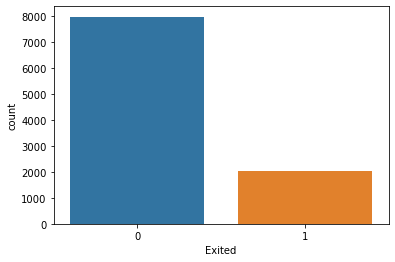

In [26]:
plt.figure
sns.countplot(data=dataset,x='Exited')

In [27]:
from sklearn.utils import resample

In [29]:
majority=dataset[dataset['Exited']==0]
minority=dataset[dataset['Exited']==1]

In [30]:
downsample=resample(majority,n_samples=2037,replace=False,random_state=42)

In [32]:
df=pd.concat([downsample,minority])

In [33]:
df['Exited'].value_counts().to_frame()

,Exited
0,2037
1,2037


<AxesSubplot:xlabel='Exited', ylabel='count'>

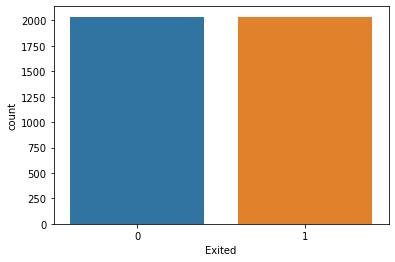

In [34]:
plt.figure
sns.countplot(data=df,x='Exited')

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,8166,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
6409,6410,15690695,Flynn,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2157,2158,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14,0
1618,1619,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
1633,1634,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0


In [36]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
df.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'],axis=1,inplace=True)

In [38]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
Age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
Tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
Balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
NumOfProducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
HasCrCard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
IsActiveMember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
EstimatedSalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
Exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<AxesSubplot:>

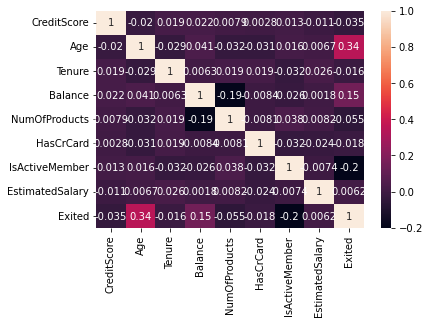

In [39]:
plt.figure
sns.heatmap(df.corr(),annot=True)

In [42]:
exited=df.corr()['Exited'].to_frame()

<AxesSubplot:ylabel='Exited'>

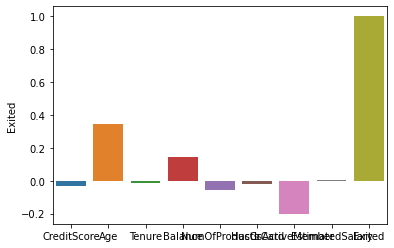

In [103]:
plt.figure
sns.barplot(data=exited,x=exited.index,y='Exited')

In [45]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2851, 8), (1223, 8), (2851,), (1223,))

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log=LogisticRegression(max_iter=400)

In [51]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [52]:
log.score(x_train,y_train)

0.663626797614872

In [53]:
log.score(x_test,y_test)

0.6524938675388389

In [54]:
y_pred=log.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [56]:
precision_score(y_test,y_pred)

0.6200607902735562

In [57]:
recall_score(y_test,y_pred)

0.6998284734133791

In [58]:
accuracy_score(y_test,y_pred)

0.6524938675388389

In [59]:
f1_score(y_test,y_pred)

0.6575342465753424

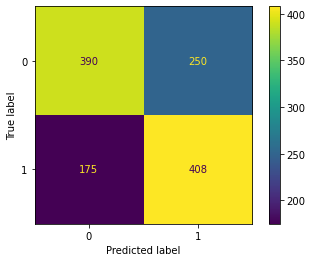

In [61]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=log.classes_),display_labels=log.classes_)
cmd.plot()

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [67]:
knn.score(x_train,y_train)

0.7642932304454577

In [68]:
knn.score(x_test,y_test)

0.5257563368765331

In [70]:
precision_score(y_test,y_pred)

0.6200607902735562

In [71]:
recall_score(y_test,y_pred)

0.6998284734133791

In [72]:
accuracy_score(y_test,y_pred)

0.6524938675388389

In [73]:
f1_score(y_test,y_pred)

0.6575342465753424

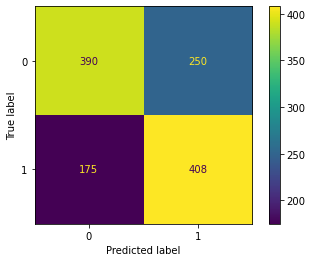

In [75]:
conf=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=knn.classes_),display_labels=knn.classes_)
conf.plot()

In [76]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [77]:

from sklearn.preprocessing import StandardScaler

In [78]:
ss=StandardScaler()

In [79]:
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.fit_transform(x_test)

In [80]:

knn.fit(x_train_ss,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [81]:
knn.score(x_train_ss,y_train)

0.8439144159943879

In [82]:
knn.score(x_test_ss,y_test)

0.7228127555192151

In [83]:
y_pred=knn.predict(x_test_ss)

In [84]:

precision_score(y_test,y_pred)

0.708904109589041

In [85]:
recall_score(y_test,y_pred)

0.7101200686106347

In [86]:
accuracy_score(y_test,y_pred)

0.7228127555192151

In [87]:
f1_score(y_test,y_pred)

0.7095115681233933

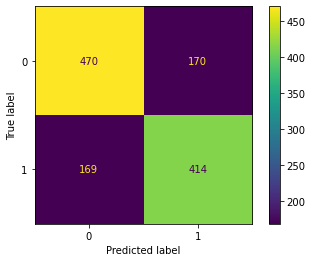

In [88]:
conf=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=knn.classes_),display_labels=knn.classes_)
conf.plot()

In [89]:

from sklearn.svm import SVC

In [90]:
svc=SVC(kernel='rbf',gamma=2,C=1)

In [91]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=2)

In [92]:
svc.score(x_train,y_train)

1.0

In [93]:

svc.score(x_test,y_test)

0.4766966475878986

In [94]:
y_pred=knn.predict(x_test_ss)

In [95]:
precision_score(y_test,y_pred)

0.708904109589041

In [96]:
recall_score(y_test,y_pred)

0.7101200686106347

In [97]:
accuracy_score(y_test,y_pred)

0.7228127555192151

In [98]:
f1_score(y_test,y_pred)

0.7095115681233933

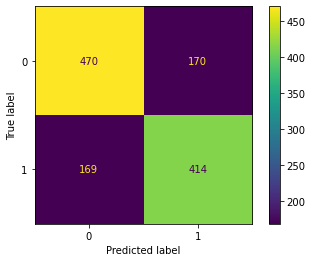

In [99]:
conf=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=svc.classes_),display_labels=svc.classes_)
conf.plot()